In [27]:
import pandas as pd
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('./data/setosa/train.csv')

In [7]:
df

,petal length (cm),petal width (cm),setosa
0,1.3,0.2,1.0
1,1.6,0.4,1.0
2,4.7,1.2,0.0
3,5.5,2.1,0.0
4,1.3,0.3,1.0
5,3.7,1.0,0.0
6,6.7,2.2,0.0
7,4.4,1.4,0.0
8,1.5,0.4,1.0
9,5.4,2.1,0.0


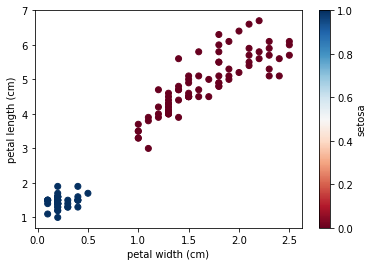

In [19]:
plt.scatter( df['petal width (cm)'], df['petal length (cm)'], c=df['setosa'], cmap='RdBu')
plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')
cb = plt.colorbar()
cb.set_label('setosa')

In [24]:
def probability_setosa( petal_width, petal_length, w0, w1, w2 ):
    
    # Compute sum of features times weights
    x = w0 + w1*petal_width + w2*petal_length
    # Apply non-linear function: sigmoid
    p = 1./( 1. + np.exp( -x ) )
    return( p )

In [25]:
probability_setosa( df['petal width (cm)'], df['petal length (cm)'], 1., 1., 1. )

0      0.924142
1      0.952574
2      0.998993
3      0.999816
4      0.930862
5      0.996665
6      0.999950
7      0.998887
8      0.947846
9      0.999797
10     0.998341
11     0.924142
12     0.937027
13     0.930862
14     0.999500
15     0.999447
16     0.999089
17     0.930862
18     0.937027
19     0.998167
20     0.997268
21     0.924142
22     0.999629
23     0.993940
24     0.937027
25     0.947846
26     0.999899
27     0.998341
28     0.947846
29     0.999325
         ...   
90     0.930862
91     0.960834
92     0.995033
93     0.999752
94     0.997975
95     0.999797
96     0.900250
97     0.916827
98     0.999254
99     0.942676
100    0.930862
101    0.930862
102    0.999176
103    0.999089
104    0.900250
105    0.937027
106    0.916827
107    0.995930
108    0.942676
109    0.997527
110    0.999816
111    0.999089
112    0.999888
113    0.998167
114    0.999877
115    0.999500
116    0.942676
117    0.999547
118    0.999629
119    0.947846
dtype: float64

In [45]:
def plot_model( w0, w1, w2 ):
    
    # Calculate the probability on a mesh
    petal_width_mesh, petal_length_mesh = \
        np.meshgrid( np.linspace(0,3,100), np.linspace(0,8,100) )
    p = probability_setosa( petal_width_mesh, petal_length_mesh, w0, w1, w2 )
    # Plot the probability on the mesh
    plt.clf()
    plt.imshow( p.T, extent=[0,3,0,8], origin='lower', 
               vmin=0, vmax=1, cmap='RdBu', aspect='auto', alpha=0.7 )
    
    # Plot the data points
    plt.scatter( df['petal width (cm)'], df['petal length (cm)'], c=df['setosa'], cmap='RdBu')
    plt.xlabel('petal width (cm)')
    plt.ylabel('petal length (cm)')
    cb = plt.colorbar()
    cb.set_label('setosa')

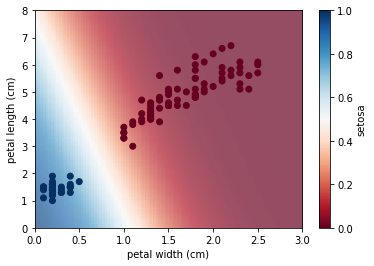

In [47]:
interact( plot_model, w0=(-4.,5.), w1=(-2.,2.), w2=(-2., 3.))

In [ ]:
w0 = 3.
w1 = -1.2
w2 = -1.1